In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(".../creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:xlabel='Class', ylabel='Count'>

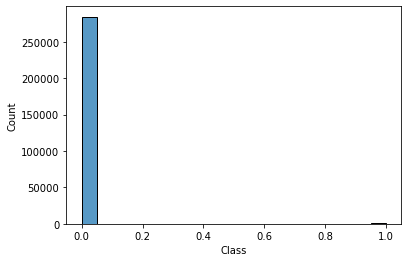

In [6]:
sns.histplot(df.Class)

In [7]:
len(df[df.Class==1]) / len(df)

0.001727485630620034

In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<AxesSubplot:>

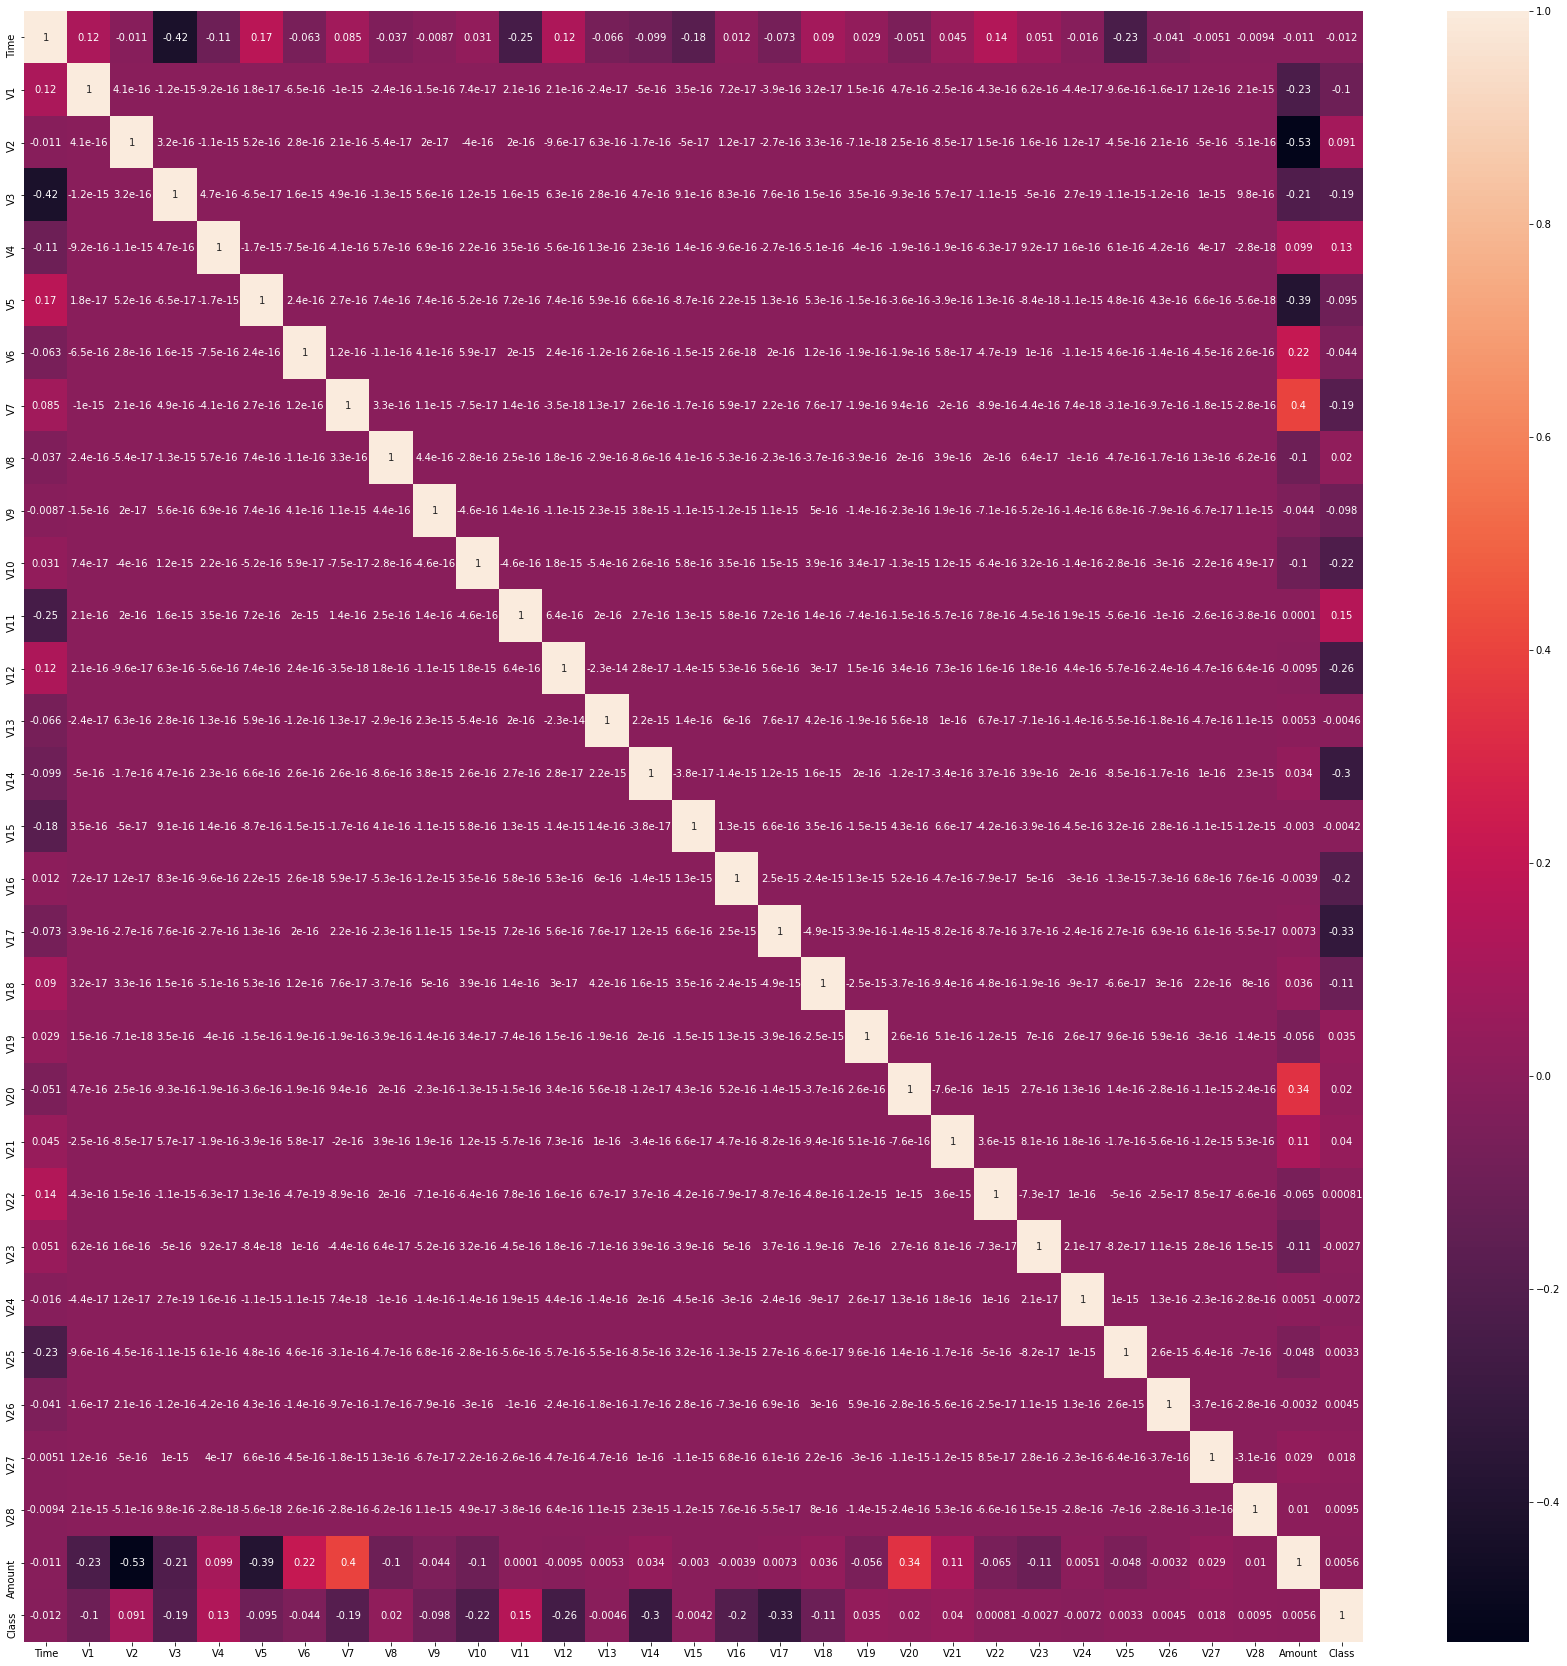

In [9]:
corr = df.corr()
corr= corr.index
plt.figure(figsize=(30,30))
sns.heatmap(df[corr].corr(),annot=True)

In [10]:
X = df.drop('Class',axis=1)
y = df.Class

In [11]:
from sklearn.model_selection import train_test_split 
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 7)

In [12]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_pred = dt.predict(x_test)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85288
           1       0.78      0.80      0.79       155

    accuracy                           1.00     85443
   macro avg       0.89      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(x_test)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85288
           1       0.78      0.80      0.79       155

    accuracy                           1.00     85443
   macro avg       0.89      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [19]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

svm_model= SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85288     0]
 [  155     0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85288
           1       0.00      0.00      0.00       155

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbt.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85288
           1       0.76      0.65      0.70       155

    accuracy                           1.00     85443
   macro avg       0.88      0.82      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter
X_resampled, Y_resampled = SMOTE().fit_resample(X, y)
X_train, x_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 7)

In [22]:

gbt = GradientBoostingClassifier().fit(X_train, y_train)
y_pred = gbt.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     85252
           1       0.99      0.98      0.99     85337

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



In [23]:
print(confusion_matrix(y_test, y_pred))

[[84737   515]
 [ 1703 83634]]
